# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import pickle

training_file = "../data/traffic_signs/train.p"
validation_file= "../data/traffic_signs/valid.p"
testing_file = "../data/traffic_signs/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [3]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [4]:
X_train = X_train/128.0-1.0
X_validation = X_validation/128.0-1.0
X_test = X_test/128.0-1.0

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

31


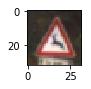

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))

plt.imshow(image/2.0+0.5)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    weights_1 = tf.Variable(tf.truncated_normal(shape=(5,5,3,32), mean=mu, stddev=sigma), name="weights_1")
    bias_1 = tf.Variable(tf.zeros(32), name="bias_1")
    layer_1 = tf.nn.conv2d(x, weights_1, strides=[1,1,1,1], padding="VALID") + bias_1

    # TODO: Activation.
    layer_1 = tf.nn.relu(layer_1)

    # TODO: Pooling. Input = 28x28x32. Output = 14x14x32.
    layer_1 = tf.nn.max_pool(layer_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

    # TODO: Layer 2: Convolutional. Output = 10x10x32.
    weights_2 = tf.Variable(tf.truncated_normal(shape=(5,5,32,32), mean=mu, stddev=sigma), name="weights_2")
    bias_2 = tf.Variable(tf.zeros(32), name="bias_2")
    layer_2 = tf.nn.conv2d(layer_1, weights_2, strides=[1,1,1,1], padding="VALID") + bias_2
    
    # TODO: Activation.
    layer_2 = tf.nn.relu(layer_2)

    # TODO: Pooling. Input = 10x10x32. Output = 5x5x32.
    layer_2 = tf.nn.max_pool(layer_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc = flatten(layer_2)
    
    # TODO: Layer 3: Fully Connected. Input = 5*5*32. Output = 120.
    weights_3 = tf.Variable(tf.truncated_normal(shape=(5*5*32,120), mean=mu, stddev=sigma), name="weights_3")
    bias_3 = tf.Variable(tf.zeros(120), name="bias_3")
    layer_3 = tf.matmul(fc, weights_3) + bias_3
    
    # TODO: Activation.
    layer_3 = tf.nn.relu(layer_3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weights_4 = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma), name="weights_4")
    bias_4 = tf.Variable(tf.zeros(84), name="bias_4")
    layer_4 = tf.matmul(layer_3, weights_4) + bias_4
    
    # TODO: Activation.
    layer_4 = tf.nn.relu(layer_4)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    weights_5 = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma), name="weights_5")
    bias_5 = tf.Variable(tf.zeros(43), name="bias_5")
    logits = tf.matmul(layer_4, weights_5) + bias_5
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.818

EPOCH 2 ...
Validation Accuracy = 0.870

EPOCH 3 ...
Validation Accuracy = 0.902

EPOCH 4 ...
Validation Accuracy = 0.905

EPOCH 5 ...
Validation Accuracy = 0.919

EPOCH 6 ...
Validation Accuracy = 0.896

EPOCH 7 ...
Validation Accuracy = 0.918

EPOCH 8 ...
Validation Accuracy = 0.904

EPOCH 9 ...
Validation Accuracy = 0.920

EPOCH 10 ...
Validation Accuracy = 0.916

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [110]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet


INFO:tensorflow:Restoring parameters from ./lenet


Test Accuracy = 0.942
